<a href="https://colab.research.google.com/github/anthonymurphysr/DS-Unit-1-Sprint-2-Statistics/blob/master/LS_DS_122_Chi2_Tests_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Practice Chi-square Tests

###Dataset description:

Slasher movies thrill audiences by portraying a lone antagonist (typically male) who attacks innocent victims with extreme violence and without apparent motive. However, this exciting (if gory) subgenre of horror film is criticized by those who view the violence as being used to “punish” female characters who engage in sexual activity during the film. To test this claim, study authors randomly sampled 50 North American slasher films released from 1960 to 2009 and coded the 485 characters appearing in them as being male or female, involved in sexual activity or not, and if they survived the film or not1. The data appears in the Slasher.csv dataset. In this project, we are going to answer a slightly simpler question: Are female characters in slasher films more likely to be "murdered" than male characters?

Source: A. Welsh (2010). "On the Perils of Living Dangerously in the Slasher Horror Film: Gender Differences in the Association Between Sexual Activity and Survival," Sex Roles, Vol. 62 pp. 762-773

You can find the Slasher.csv file here:

<https://raw.githubusercontent.com/Chelsea-Myers/Lambda-Intro/master/Slasher.csv>





### 1) Load the Slasher.csv dataset in a new dataframe.



In [1]:
# YOUR WORK HERE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from scipy import stats

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Chelsea-Myers/Lambda-Intro/master/Slasher.csv')

###2) Display the top 5 rows of the dataframe to take a look at the variable names and values.

In [3]:
df.head()

,ID,Gender,Activity,Survival
0,1,1,1,1
1,2,1,1,1
2,3,1,1,1
3,4,1,1,1
4,5,1,1,1


The variable codes are:

ID = Character ID

Gender = Character gender.  0 = female, 1 = male

Activity = Character was portrayed as engaged in sexual activity.  0 = no, 1 = yes

Survival = Character survival in the film. 0 = did not survive, 1 = survived

###3) Calculate the frequency and relative frequency of male and female characters in this set of slasher films.  Describe your results in a sentence or two.

In [4]:
# YOUR WORK HERE
gender = pd.crosstab(index=df['Gender'], columns='columns')
gender

col_0,columns
Gender,
0,263
1,222


In [5]:
gender / gender.sum() * 100

col_0,columns
Gender,
0,54.226804
1,45.773196


Describe your results here.


---


In this particular sample of slasher films, female characters appear 263 times while male characters appear 222 times. This indicates that female characters appear 54% of the time and males equate to the other 46%.

###4) Calculate the frequency and relative frequency of character survival in this set of slasher films.  Describe your results in a sentence or two.

Describe your results here.


---


In this sample of slasher films, the characters died 400 times, while only surviving 85 times. This huge imbalance of death vs survival is shown in the 82.5% fatality rate compared to the 17.5% survival rate.

In [6]:
# YOUR WORK HERE
survival = pd.crosstab(index=df['Survival'], columns='columns')
survival

col_0,columns
Survival,
0,400
1,85


In [7]:
survival / survival.sum() * 100

col_0,columns
Survival,
0,82.474227
1,17.525773


###5) Calculate the joint distribution of character sex and movie survival. Add the table margins.  

Hint: If you are working off of the in-class examples, it will be helpful to include character sex as the index variable. 

Describe your results in a sentence or two.

In [8]:
# YOUR WORK HERE
ss = pd.crosstab(df['Gender'], df['Survival'], margins=True)
ss

Survival,0,1,All
Gender,,,
0,228,35,263
1,172,50,222
All,400,85,485


In [9]:
# YOUR WORK HERE
female_dead = 228/263*100
female_alive= 35/263*100
male_dead = 172/222*100
male_alive = 50/222*100

print('The percentage of females dead: ' + str(female_dead))
print('The percentage of females alive: ' + str(female_alive))
print('The percentage of males dead: ' + str(male_dead))
print('The percentage of males alive: ' + str(male_alive))

The percentage of females dead: 86.69201520912547
The percentage of females alive: 13.307984790874524
The percentage of males dead: 77.47747747747748
The percentage of males alive: 22.52252252252252


Describe your results here.


---


In this sample of slasher films, female characters die 87% of the time, while only surviving 13%. Male characters tend to fare slightly better in that they only die 77% of the time while surviving 23%.

###6) Calculate the distribution of survival conditional on character sex.
Hint: If you are working off of the in-class examples, it will be helpful to include character sex as the index variable. 

Describe your results in a sentence or two.

In [10]:
# YOUR WORK HERE
sex_survival = pd.crosstab(df['Gender'], df['Survival'])
sex_survival

Survival,0,1
Gender,,
0,228,35
1,172,50


In [11]:
fem_surv = 35/263*100
fem_dead = 228/263*100
male_surv = 50/222*100
male_dead = 172/222*100

print(fem_surv)
print(fem_dead)
print(male_surv)
print(male_dead)


13.307984790874524
86.69201520912547
22.52252252252252
77.47747747747748


Describe your results here.


---


In this sample of slasher films, characters that were female died 87% of the time, while surviving only 13% of the time. Male characters however, survived 23% of the time while dying 77%.

###7) Identify the appropriate null and alternative hypotheses to test for a statistically significant relationship between character sex and survival. 

**Ho:** Characters that are female in slasher films are just as likely to survive as characters that are male.

**Ha:** Characters that are female in slasher films are not as likely to survive as characters that are male.

### 8) Perform the chi-square test above using `stats.chi2_contingency()` and output the p-value.


In [12]:
# YOUR WORK HERE
g, p, dof, exptd = stats.chi2_contingency(pd.crosstab(df['Gender'], df['Survival']))

In [13]:
print('The p-value is: ' + str(p))

The p-value is: 0.011104692591139975


### 9) Interpret your p-value in 8) at the 0.05 significance level, and summarize your results in a sentence or two.

Describe your results in a sentence or two.


---


With a p-value of .01 and a significance level of .05, I reject the null hypothesis. Being that characters that are female in slasher films are just as likely to survive as characters that are male.

### 10) Create a side-by-side bar plot to illuatrate the relationship between character sex and survival in Slasher movies.  Sum up your overall results in a sentence or two.

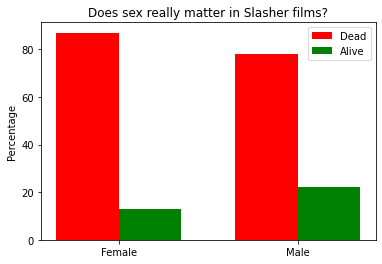

In [14]:
# YOUR WORK HERE
import matplotlib.pyplot as plt

# Total number of plots
N = 2

active = (13, 22)
nonactive =(87, 78)

# Set indices according to N
ind = np.arange(N)

# Bar width
width = 0.35

#Create the plot
fig, ax = plt.subplots()

# No sexy time
rects1 = ax.bar(ind, nonactive, width, color='r')

# Sexy time
rects2 = ax.bar(ind + width, active, width, color='g')

# Set Labels
ax.set_ylabel('Percentage')
ax.set_title('Does sex really matter in Slasher films?')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Female', 'Male'))

# Set legend
ax.legend((rects1[0], rects2[0]), ('Dead', 'Alive'));

Sum up your results in a sentence or two.


---


In slasher films, death is highly likely for characters as it occurs approximately 83% of the time. However, female characters have a rougher go of things perishing approximately 87% of the time, while surviving only 13%. Males on the other hand, survive at a rate of 22% while perishing at a rate of 78%. Overall females have a 9% higher chance of being killed in a slasher film compared to their male counterparts. 

## Stretch Goals:

###1. Explore the concept of an odds ratio

Another way to quantify the relationship between two categorical variables is by calculating the odds ration, which is the ratio of the odds of an event happening in one group to the odds of the event happening in another group.

[Lots more about the odds ratio](https://en.wikipedia.org/wiki/Odds_ratio).

We can use Python to calculate the odds of surviving a slaser movie for female compared to male characters.

You can find more information about calculating the odds ratio for a 2x2 table in Python [here](https://www.statsmodels.org/stable/contingency_tables.html).  Scroll down to the section labeled "A Single 2x2 Table".

Calculate the odds ratio comparing the odds of movie survival in female compared to male characters.  Interpret what this number tells you about the likelihood of male and female characters surviving the film.


In [15]:
# YOUR WORK HERE
g, p, dof, exptd = stats.chi2_contingency(pd.crosstab(df['Gender'], df['Survival']))

print(p)

0.011104692591139975


In [16]:
# Import 
import statsmodels.api as sm;

# Create crosstab for ease of table creation
pd.crosstab(df['Gender'], df['Survival'])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Survival,0,1
Gender,,
0,228,35
1,172,50


In [17]:
# Create table
table = np.asarray([[228, 35], [172, 50]])

# Create 2x2 from table
t22 =  sm.stats.Table2x2(table.T)

# Print summary of 2x2 Table
print(t22.summary())

               Estimate   SE   LCB   UCB  p-value
-------------------------------------------------
Odds ratio        1.894       1.177 3.046   0.008
Log odds ratio    0.639 0.242 0.163 1.114   0.008
Risk ratio        1.384       1.059 1.810   0.017
Log risk ratio    0.325 0.137 0.057 0.593   0.017
-------------------------------------------------


Sum up your results in a sentence or two.


---


I'm not sure what any of these numbers mean but it was cool to build it.


### 2. Learn about Simpson's Paradox

[Simpson's Paradox](https://en.wikipedia.org/wiki/Simpson%27s_paradox#:~:text=Simpson's%20paradox%2C%20which%20goes%20by,when%20these%20groups%20are%20combined.) occurs when a trend that appears in separate groups disappears or reverses when those groups are combined.  

Create a scenario where Hopsital A has a lower overall mortality rate than Hospital B but has a higher mortality rate if cases are separated into two groups: high risk and low risk.


In [18]:
# YOUR WORK HERE

Sum up your results in a sentence or two.